# 다층 퍼셉트론 (MLP)

#### 변경점
1. 모델 구조 변화
2. 과적합, Dropout Layer 추가
3. 학습속도 둔화 및 일반화 성능 저하 확인, 활성화 함수에 맞는 가중치 초기화 방법을 추가

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets

## 0. 파라미터 <a name="parameters"></a>

In [2]:
NUM_CLASSES = 10

## 1. 데이터 준비 <a name="prepare"></a>

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
print('train shape : ', np.shape(x_train))
print('test shape : ', np.shape(x_test))

train shape :  (50000, 32, 32, 3)
test shape :  (10000, 32, 32, 3)


In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

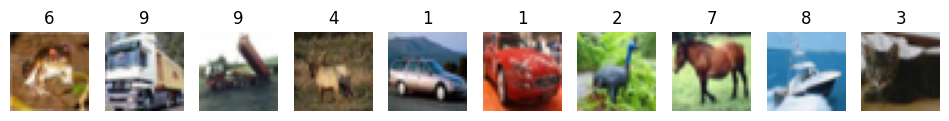

In [6]:
fig, axes = plt.subplots(1,10, figsize = (12, 5))
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].set_title(np.argmax(y_train[i]))
    axes[i].axis('off')
plt.show()

## 2. 모델 구축 <a name="build"></a>

In [7]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer) # 3072
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dense(100, activation="relu")(x)
output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2000)              6146000   
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 100)               50100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010  

## 3. 모델 훈련 <a name="train"></a>

In [8]:
opt = optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [9]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9244 - accuracy: 0.2963 - val_loss: 1.7607 - val_accuracy: 0.3692
Epoch 2/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.7371 - accuracy: 0.3735 - val_loss: 1.7549 - val_accuracy: 0.3738
Epoch 3/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6450 - accuracy: 0.4079 - val_loss: 1.6723 - val_accuracy: 0.4016
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5788 - accuracy: 0.4326 - val_loss: 1.5939 - val_accuracy: 0.4207
Epoch 5/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.5322 - accuracy: 0.4462 - val_loss: 1.5838 - val_accuracy: 0.4275
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4926 - accuracy: 0.4612 - val_loss: 1.5732 - val_accuracy: 0.4448
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4624 - accuracy: 0.4742 - val_loss: 1.5381 - val_accuracy:

In [11]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

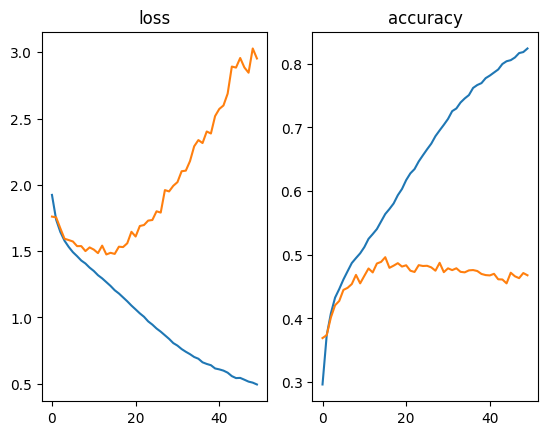

In [13]:
train_loss = hist.history['loss']
train_acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_accuracy']

fig, axes = plt.subplots(1,2)
axes[0].plot(train_loss, label='train_loss')
axes[0].plot(val_loss, label='val_loss')
axes[0].set_title('loss')
axes[1].plot(train_acc, label='train_acc')
axes[1].plot(val_acc, label='val_acc')
axes[1].set_title('accuracy')
plt.show()

## 4. 모델 구축 <a name="build"></a>

In [35]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer) # 3072
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dense(100, activation="relu")(x)
x = layers.Dropout(0.1)(x)
output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_40 (Dense)            (None, 2000)              6146000   
                                                                 
 dense_41 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_42 (Dense)            (None, 500)               500500    
                                                                 
 dense_43 (Dense)            (None, 100)               50100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0   

## 5. 모델 훈련 <a name="train"></a>

In [36]:
opt = optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [37]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 25s 20ms/step - loss: 2.0016 - accuracy: 0.2539 - val_loss: 1.8206 - val_accuracy: 0.3307
Epoch 2/50
1250/1250 [==============================] - 32s 26ms/step - loss: 1.7881 - accuracy: 0.3522 - val_loss: 1.7349 - val_accuracy: 0.3699
Epoch 3/50
1250/1250 [==============================] - 31s 25ms/step - loss: 1.7051 - accuracy: 0.3879 - val_loss: 1.6818 - val_accuracy: 0.3920
Epoch 4/50
1250/1250 [==============================] - 32s 25ms/step - loss: 1.6567 - accuracy: 0.4046 - val_loss: 1.6703 - val_accuracy: 0.4005
Epoch 5/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.5968 - accuracy: 0.4259 - val_loss: 1.5812 - val_accuracy: 0.4349
Epoch 6/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.5649 - accuracy: 0.4405 - val_loss: 1.6533 - val_accuracy: 0.4119
Epoch 7/50
1250/1250 [==============================] - 29s 23ms/step - loss: 1.5350 - accuracy: 0.4497 - val_loss: 1.5508 -

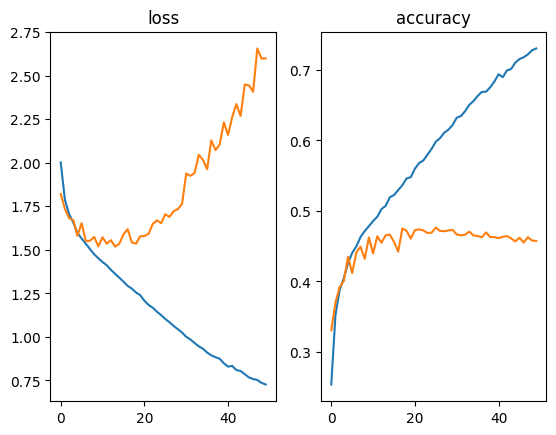

In [38]:
train_loss = hist.history['loss']
train_acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_accuracy']

fig, axes = plt.subplots(1,2)
axes[0].plot(train_loss, label='train_loss')
axes[0].plot(val_loss, label='val_loss')
axes[0].set_title('loss')
axes[1].plot(train_acc, label='train_acc')
axes[1].plot(val_acc, label='val_acc')
axes[1].set_title('accuracy')
plt.show()

## 6. 모델 구축 <a name="build"></a>

In [43]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer) # 3072
x = layers.Dense(2000, activation="relu", kernel_initializer='he_uniform', bias_initializer='he_uniform')(x)
x = layers.Dense(1000, activation="relu", kernel_initializer='he_uniform', bias_initializer='he_uniform')(x)
x = layers.Dense(500, activation="relu", kernel_initializer='he_uniform', bias_initializer='he_uniform')(x)
x = layers.Dense(100, activation="relu", kernel_initializer='he_uniform', bias_initializer='he_uniform')(x)
x = layers.Dropout(0.1)(x)
output_layer = layers.Dense(NUM_CLASSES, activation="softmax", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_50 (Dense)            (None, 2000)              6146000   
                                                                 
 dense_51 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_52 (Dense)            (None, 500)               500500    
                                                                 
 dense_53 (Dense)            (None, 100)               50100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0   

## 7. 모델 훈련 <a name="train"></a>

In [44]:
opt = optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [45]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9860 - accuracy: 0.2760 - val_loss: 1.8183 - val_accuracy: 0.3456
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7697 - accuracy: 0.3614 - val_loss: 1.7167 - val_accuracy: 0.3806
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6851 - accuracy: 0.3932 - val_loss: 1.6519 - val_accuracy: 0.4051
Epoch 4/50
1250/1250 [==============================] - 12s 10ms/step - loss: 1.6278 - accuracy: 0.4157 - val_loss: 1.6697 - val_accuracy: 0.4029
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5840 - accuracy: 0.4315 - val_loss: 1.5982 - val_accuracy: 0.4271
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5482 - accuracy: 0.4452 - val_loss: 1.5844 - val_accuracy: 0.4399
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5172 - accuracy: 0.4527 - val_loss: 1.5519 - val_ac

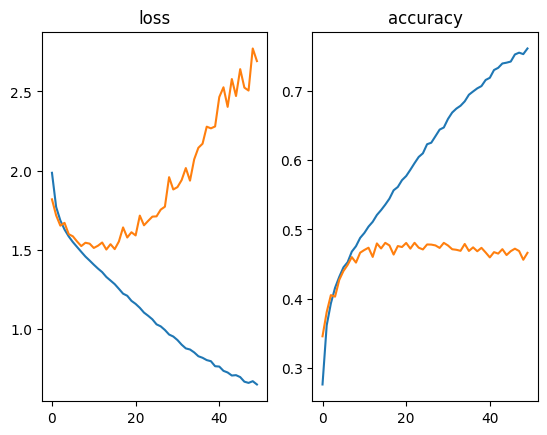

In [46]:
train_loss = hist.history['loss']
train_acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_accuracy']

fig, axes = plt.subplots(1,2)
axes[0].plot(train_loss, label='train_loss')
axes[0].plot(val_loss, label='val_loss')
axes[0].set_title('loss')
axes[1].plot(train_acc, label='train_acc')
axes[1].plot(val_acc, label='val_acc')
axes[1].set_title('accuracy')
plt.show()

## 8. 평가 <a name="evaluate"></a>

In [47]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.6003 - accuracy: 0.4718


[2.6003124713897705, 0.4717999994754791]

In [48]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 0s 1ms/step


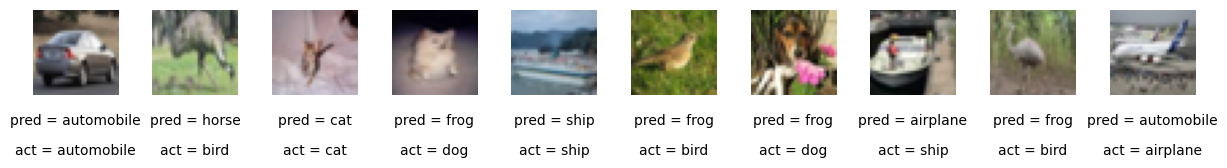

In [49]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)